### Linear Regression Practical Implementation

In [75]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Load the dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)

# Display the first few rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [77]:
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [78]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [79]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [80]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [82]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

np.mean(mse)

-25.550660791660793

In [83]:
##prediction 
reg_pred=regression.predict(X_test)

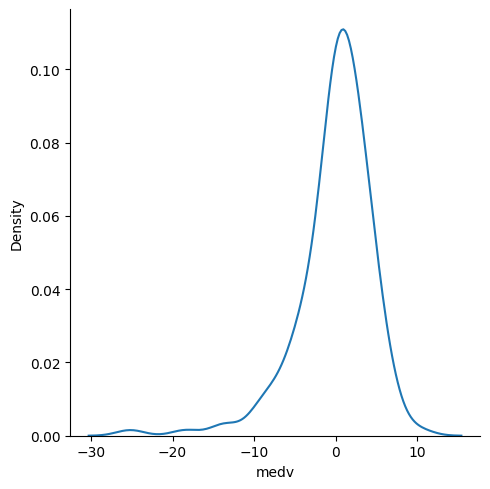

In [84]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [85]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.6693702691495593

## Ridge Regression Algorithm

In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [87]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='r2',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='r2')

In [88]:
print(ridgecv.best_params_)
print('best ridge score: ', ridgecv.best_score_)

{'alpha': 20}
best ridge score:  0.6917447889048314


## Test all values from 1 to 50

In [89]:
alphas = np.arange(1, 50)

# Initialize the Ridge regressor
ridge_regressor = Ridge()

# Set up the parameter grid
parameters = {'alpha': alphas}

In [90]:
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='r2', cv=5)

# Fit the model to the training data
ridgecv.fit(X_train, y_train)

# Retrieve the best alpha value
best_alpha = ridgecv.best_params_['alpha']
print(f"The best alpha value is: {best_alpha}")

The best alpha value is: 20


In [91]:
ridge_pred=ridgecv.predict(X_test)

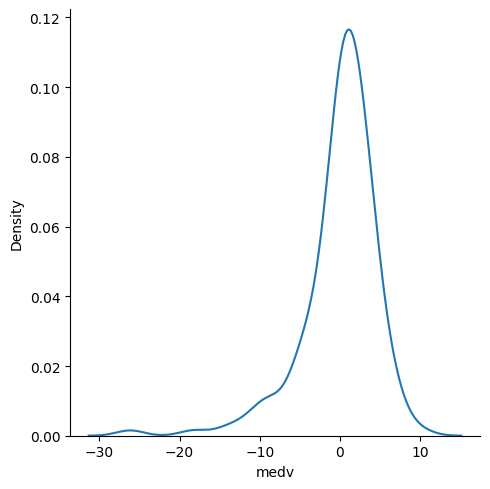

In [92]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [93]:
score=r2_score(ridge_pred,y_test)
score

0.6280248904082947

## Lasso Regression

In [94]:
from sklearn.linear_model import Lasso

In [95]:
lasso=Lasso()
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [104]:
print(lassocv.best_params_)
print('best score: ',lassocv.best_score_)

{'alpha': 1}
best score:  -31.153603752119004


In [97]:
lasso_pred=lassocv.predict(X_test)

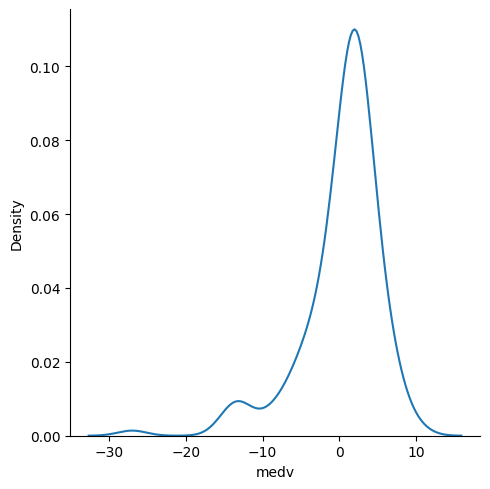

In [98]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

In [99]:
r2_score(y_test,lasso_pred)

0.6439219427114921

## Normal Lasso

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate Sample Data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100)  # True relationship

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # λ = 0.1
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
print("Lasso MSE:", mse)

# Display Coefficients
print("Lasso Coefficients:", lasso.coef_)


Lasso MSE: 0.9218118933165386
Lasso Coefficients: [ 1.36645736  0.58798862  0.         -0.         -0.        ]


In [101]:
from sklearn.linear_model import LassoCV

# Automatically finds the best alpha using cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

# Best alpha
print("Best Alpha:", lasso_cv.alpha_)
print('r2: ' , r2_score(y_test, y_pred))
print("Lasso Coefficients:", lasso_cv.coef_)

Best Alpha: 0.01757510624854793
r2:  0.29601902748500963
Lasso Coefficients: [ 2.42413587  1.5656274   0.38692181  0.         -0.27173107]


In [102]:
from sklearn.model_selection import GridSearchCV

las = Lasso()
parameters2={'alpha':[0.1, 1, 10]}

gs = GridSearchCV(las,parameters2, scoring='r2')
gs.fit(X_train, y_train)

# Best alpha
print("Best Alpha:", gs.best_params_)
print('best score: ',gs.best_score_)


Best Alpha: {'alpha': 0.1}
best score:  0.11877517577468748


In [103]:
np.sum(lasso_cv.coef_ != 0)

4